# Introduction to Combinatorial and Polyhedral Geometry in Sage

## Important pages in the Reference Manual:

- General Page: https://doc.sagemath.org/html/en/reference/discrete_geometry/index.html
- Thematic Tutorials: https://doc.sagemath.org/html/en/thematic_tutorials/geometry.html


## $V$-representation

First, let’s define a polyhedron object as the convex hull of a set of points and some rays.

In [1]:
P1 = Polyhedron(vertices=[[1, 0], [0, 1]], rays=[[1, 1]])

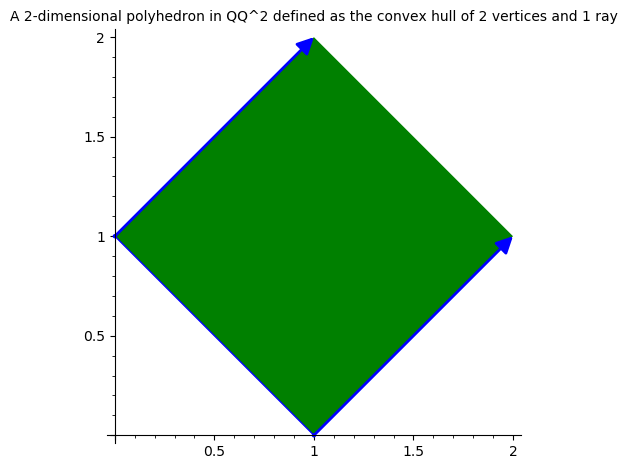

In [2]:
P1

The string representation already gives a lot of information:

* the dimension of the polyhedron (the smallest affine space containing it)
* the dimension of the space in which it is defined
* the base ring ($\mathbb{Q}^2$) over which the polyhedron lives (this specifies the parent class)
* the number of vertices
* the number of rays

We can see all the methods available by pressing <tab> after the dot.

In [ ]:
P1.

We can also add a lineality space.

In [3]:
P2 = Polyhedron(vertices=[[1/2, 0, 0], [0, 1/2, 0]], rays=[[1, 1, 0]],lines=[[0, 0, 1]])

In [4]:
P2

A 3-dimensional polyhedron in QQ^3 defined as the convex hull of 2 vertices, 1 ray, 1 line (use the .plot() method to plot)

In [5]:
P2.plot()

Graphics3d Object

In [6]:
P1.parent()

Polyhedra in QQ^2

In [7]:
P2.parent()

Polyhedra in QQ^3

## $H$-representation

If a polyhedron object was constructed via a $V$-representation, Sage can provide the $H$-representation of the object.

In [8]:
for h in P1.Hrepresentation():
    print(h)

An inequality (1, 1) x - 1 >= 0
An inequality (1, -1) x + 1 >= 0
An inequality (-1, 1) x + 1 >= 0


Each line gives a row of the matrix $A$ and an entry of the vector $b$. The variable $x$ is a vector in the ambient space where $P1$ is defined. The $H$-representation may contain equations:

The construction of a polyhedron object via its $H$-representation, requires a precise format. Each inequality $(a_{i1},\ldots,a_{id})⋅x+bi\geq 0$ must be written as $[b_i,a_{i1}, \ldots, a_{id}]$.

It is worth using the parameter eqns to shorten the construction of the object. In the following example, the first four rows are the negative of the second group of four rows.

## As we learned from lectures, examples are very important. Sage has implemented several examples: http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html


## Representation of objects

Many objects are related to the  $H$- and $V$-representations. Sage has classes implemented for them.

### $H$-representation

You can store the $H$-representation in a variable and use the inequalities and equalities as objects.

In [9]:
P3_QQ = Polyhedron(vertices = [[0.5, 0], [0, 0.5]], base_ring=QQ)

In [10]:
HRep = P3_QQ.Hrepresentation()

In [11]:
H1 = HRep[0]; H1

An equation (2, 2) x - 1 == 0

In [12]:
H2 = HRep[1]; H2

An inequality (0, -2) x + 1 >= 0

In [13]:
 H1.A()

(2, 2)

In [14]:
H1.b()

-1

In [17]:
H1.contains(vector([0,0]))

False

In [18]:
H2.contains(vector([0,0]))

True

In [19]:
H1.is_incident(H2)

True

It is possible to obtain the different objects of the H-representation as follows.

In [20]:
P3_QQ.equations()

(An equation (2, 2) x - 1 == 0,)

In [21]:
P3_QQ.inequalities()

(An inequality (0, -2) x + 1 >= 0, An inequality (0, 1) x + 0 >= 0)

### $V$-representation

Similarly, you can access vertices, rays and lines of the polyhedron.

In [22]:
VRep = P2.Vrepresentation(); VRep

(A line in the direction (0, 0, 1),
 A vertex at (0, 1/2, 0),
 A vertex at (1/2, 0, 0),
 A ray in the direction (1, 1, 0))

In [23]:
L = VRep[0]; L

A line in the direction (0, 0, 1)

In [24]:
V = VRep[1]; V

A vertex at (0, 1/2, 0)

In [25]:
R = VRep[3]; R

A ray in the direction (1, 1, 0)

In [26]:
L.is_line()

True

In [27]:
L.is_incident(V)

True

In [28]:
R.is_incident(L)

False

In [29]:
L.vector()

(0, 0, 1)

In [30]:
V.vector()

(0, 1/2, 0)

It is possible to obtain the different objects of the V-representation as follows.

In [31]:
P2.vertices()

(A vertex at (0, 1/2, 0), A vertex at (1/2, 0, 0))

In [32]:
P2.rays()

(A ray in the direction (1, 1, 0),)

In [33]:
P2.lines()

(A line in the direction (0, 0, 1),)

In [34]:
 P2.vertices_matrix()

[  0 1/2]
[1/2   0]
[  0   0]

# The algebra of polytopes: classical operations

### Polar and Dilation

In [35]:
Cube = polytopes.cube()
Octahedron = 3/2 * Cube.polar()  # Dilation

### Minkowski sum

In [36]:
Cuboctahedron = Cube + Octahedron # Minkowski sum
Cuboctahedron.show()

Graphics3d Object

### Minkowski difference (when it makes sense)

In [37]:
Mdiff = Cube - Polyhedron(vertices=[[-1,0,0],[1,0,0]])  # Minkowski difference
Mdiff.plot()

Graphics3d Object

### Intersection

In [38]:
Permu = Cube & Octahedron   # Intersection
Permu.show(opacity=0.5)   

Graphics3d Object

### Question to Sage developers listening: is this a bug ?

### Cartesian product

In [39]:
CP = Cube * Octahedron; CP   # Cartesian product

A 6-dimensional polyhedron in QQ^6 defined as the convex hull of 48 vertices (use the .plot() method to plot)

In [40]:
CP.f_vector()

(1, 48, 168, 244, 182, 72, 14, 1)

### Affine transformation through coersion

In [43]:
zo_cube = polytopes.cube(intervals='zero_one').change_ring(QQ) # (0,1) 3-d cube
transformation = matrix(AA,[[1,sqrt(2),sqrt(3)],[0,1,sqrt(5)],[0,0,1]])
skew_cube = transformation * zo_cube + vector([0,0,1/2])
skew_cube.plot(color='blue',opacity=0.75) + zo_cube.plot(color='red',opacity=0.75)

Graphics3d Object

In [44]:
print("The cube base ring is: {}".format(zo_cube.base_ring()))
print("The skew cube base ring is: {}\n".format(skew_cube.base_ring()))
print("The cube backend is: {}".format(zo_cube.backend()))
print("The skew cube backend is: {}".format(skew_cube.backend()))

The cube base ring is: Rational Field
The skew cube base ring is: Algebraic Real Field

The cube backend is: ppl
The skew cube backend is: field


## There are many more operations that are possible: http://doc.sagemath.org/html/en/thematic_tutorials/geometry/polyhedra_quickref.html

### A cool trick to get back the input of an object:


In [45]:
An_important_polytope = skew_cube & zo_cube  # This was hard to compute... let's say!
sage_input(An_important_polytope)

R.<y> = QQ[]
v = AA.polynomial_root(AA.common_polynomial(y^8 - 12*y^6 + 23*y^4 - 12*y^2 + 1), RIF(RR(0.83755602382334116), RR(0.83755602382334127)))
Polyhedron(backend='field', base_ring=AA, vertices=[(AA(0), AA(0), AA(1/2)), (1/5*v^6 - 12/5*v^4 + 22/5*v^2 - 6/5, AA(1), 8/35*v^6 - 18/7*v^4 + 24/7*v^2 - 19/70), (AA(1), AA(0), AA(1/2)), (AA(1), 3/7*v^7 - 71/14*v^5 + 125/14*v^3 - 43/14*v, AA(1/2)), (AA(1), AA(1), 2/7*v^7 + 13/49*v^6 - 24/7*v^5 - 148/49*v^4 + 46/7*v^3 + 216/49*v^2 - 22/7*v - 79/98), (AA(1), AA(1), 8/35*v^6 - 18/7*v^4 + 24/7*v^2 - 19/70)])

### What if I want to include a polytope to my article in latex?
#### First, you may want to have a look at the inequalities, just for sanity check:

In [46]:
print(Permu.Hrepresentation_str())

-2*x0 - 2*x1 - 2*x2 >= -3 
-2*x0 - 2*x1 + 2*x2 >= -3 
-2*x0 + 2*x1 - 2*x2 >= -3 
-2*x0 + 2*x1 + 2*x2 >= -3 
                -x0 >= -1 
                -x1 >= -1 
                -x2 >= -1 
 2*x0 + 2*x1 + 2*x2 >= -3 
                 x2 >= -1 
                 x1 >= -1 
                 x0 >= -1 
 2*x0 - 2*x1 - 2*x2 >= -3 
 2*x0 - 2*x1 + 2*x2 >= -3 
 2*x0 + 2*x1 - 2*x2 >= -3 


#### Then, you can create the latex code:

In [47]:
latex_code = LatexExpr(Permu.Hrepresentation_str(latex=True))
print(latex_code)
view(latex_code)

\begin{array}{rcl}
-2 \, x_{0} - 2 \, x_{1} - 2 \, x_{2} & \geq & -3 \\
-2 \, x_{0} - 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
-2 \, x_{0} + 2 \, x_{1} - 2 \, x_{2} & \geq & -3 \\
-2 \, x_{0} + 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
                               -x_{0} & \geq & -1 \\
                               -x_{1} & \geq & -1 \\
                               -x_{2} & \geq & -1 \\
 2 \, x_{0} + 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
                                x_{2} & \geq & -1 \\
                                x_{1} & \geq & -1 \\
                                x_{0} & \geq & -1 \\
 2 \, x_{0} - 2 \, x_{1} - 2 \, x_{2} & \geq & -3 \\
 2 \, x_{0} - 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
 2 \, x_{0} + 2 \, x_{1} - 2 \, x_{2} & \geq & -3 
\end{array}


### Then, maybe you would like to add a tikz picture of your polytope...

In [96]:
Permu.plot()

Graphics3d Object

In [99]:
latex.add_to_preamble("\\usepackage{tikz}")
tikz_code = Permu.projection().tikz([-0.0649,-0.5135,-0.8557],167.66,scale=4)
view(tikz_code)

### The code is easy to read:

In [113]:
print('\n'.join(tikz_code.splitlines()[:20]))

\begin{tikzpicture}%
	[x={(-0.968571cm, -0.116988cm)},
	y={(0.248738cm, -0.455685cm)},
	z={(0.000039cm, 0.882420cm)},
	scale=4.000000,
	back/.style={loosely dotted, thin},
	edge/.style={color=blue!95!black, thick},
	facet/.style={fill=blue!95!black,fill opacity=0.800000},
	vertex/.style={inner sep=1pt,circle,draw=green!25!black,fill=green!75!black,thick,anchor=base}]
%
%
%% Coordinate of the vertices:
%%
\coordinate (0.00000, 1.00000, -0.50000) at (0.00000, 1.00000, -0.50000);
\coordinate (0.00000, 1.00000, 0.50000) at (0.00000, 1.00000, 0.50000);
\coordinate (1.00000, 0.00000, 0.50000) at (1.00000, 0.00000, 0.50000);
\coordinate (1.00000, -0.50000, 0.00000) at (1.00000, -0.50000, 0.00000);
\coordinate (0.50000, 1.00000, 0.00000) at (0.50000, 1.00000, 0.00000);
\coordinate (1.00000, 0.00000, -0.50000) at (1.00000, 0.00000, -0.50000);
\coordinate (1.00000, 0.50000, 0.00000) at (1.00000, 0.50000, 0.00000);


### You may have computed the f-vector, and would like to save the object for later use or to send to a colleague...

In [48]:
Permu.f_vector()

(1, 24, 36, 14, 1)

In [49]:
# Saves in the current folder
Permu.save('some_cool_polytope.sobj')

In [50]:
loaded_polytope = load("some_cool_polytope")

### The f-vector is preserved after saving:

In [51]:
loaded_polytope.f_vector.is_in_cache()

True

## Many other ways to play around...

In [130]:
D = polytopes.dodecahedron(base_ring=AA, backend='normaliz')
I = 2 * polytopes.regular_polygon(3).bipyramid()

# Intersect, then take the convex union with a cube!
funky = D.intersection(I).convex_hull(polytopes.cube())
funky.show()

Graphics3d Object

## Internal backends for computations

### There are several possible backends to do computations with polyhedral objects. The performance and possible base rings differ depending on the chosen backend (ppl, cdd, normaliz, native python "field", polymake)

### The features of each backend are steadily under development and constantly improving. (We need feedback to know which features of which backends are desired!)

### A good example is to compute the volume of a polytope:

In [83]:
Permu.volume()  # default

4

In [84]:
Permu.volume(engine='latte')  # uses LattE Integrale

4

In [85]:
# uses normaliz, which requires to change the backend.
Permu.base_extend(base_ring=QQ,backend='normaliz').volume(engine='normaliz')

4

In [86]:
Permu.volume(engine='lrs')

4.0

### Certain backends have some more features that are interfaced. $h^*$-vector is an example with normaliz:

In [120]:
Permu_normaliz = (2 * Permu).base_extend(base_ring=ZZ,backend='normaliz') # Making it a lattice polytope by scaling
Permu_normaliz.h_star_vector()

[1, 53, 119, 19]

## Exercise: Combinatorial Equivalence

In this exercise, you will construct the cuboctahedron in several different ways and verify that you get the same combinatorial type.

### 1) The first options is to check if it is in the library: <http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html>. It is! So we can just use the provided construction.

In [52]:
CO = polytopes.cuboctahedron()

Let's see if it looks like what we expect:

In [53]:
CO.plot(frame=False)

Graphics3d Object

We can ask the $f$-vector of the cuboctahedron:

In [54]:
CO.f_vector()

(1, 12, 24, 14, 1)

### 2) The second construction uses the fact that we can truncate the vertices by new hyperplanes that cross the edges exactly at the mid-point.



In [55]:
Cube = polytopes.cube()

In [56]:
TC = Cube.truncation(1/2)

Just to make a sanity check we can compute the f-vector:



In [57]:
TC.f_vector()

(1, 12, 24, 14, 1)


But as we know, two different polytopes can have the same f-vector, so we should check if they are combinatorially isomorphic:



In [58]:
TC.is_combinatorially_isomorphic(CO)

True

This is great!

Just to understand the truncation construction better, visualize the usual truncation:


In [59]:
TC2 = Cube.truncation()

In [60]:
TC2.show(frame=False)

Graphics3d Object

### 3) The third construction will use some nice trick that we can do in sage.

We can take the polar dual of the cube, the octahedron, and scale it by a factor 2:

In [61]:
OC = 2 * Cube.polar()

#### Then, we can take the intersection with the cube again :

In [62]:
COC = Cube & OC

#### What is COC?

In [63]:
COC.is_combinatorially_isomorphic(TC)

True

<class 'sage.geometry.polyhedron.parent.Polyhedra_QQ_ppl_with_category.element_class'>